In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [4]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [16]:
df_train.isnull().any()

x    False
y     True
dtype: bool

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [18]:
import matplotlib.pyplot as plt

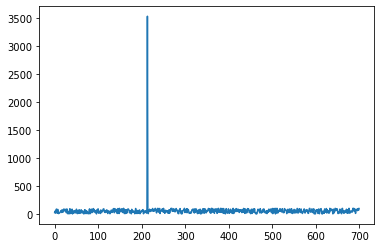

In [21]:
plt.plot(df_train['x'])

In [23]:
import seaborn as sns

C:\Python3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

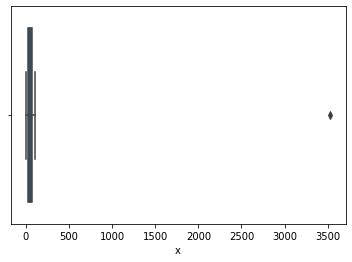

In [25]:
sns.boxplot(df_train['x'])

# These 2 graphs shows there is a outlier at 3500

In [27]:
df_train['x'] = df_train['x'].clip(upper=df_train['x'].quantile(0.99))
df_train['x'] = df_train['x'].clip(lower=df_train['x'].quantile(0.01))
df_train['y'] = df_train['x'].clip(upper=df_train['y'].quantile(0.99))
df_train['y'] = df_train['x'].clip(lower=df_train['y'].quantile(0.01))

In [28]:
df_train.head()

,x,y
0,24.0,24.0
1,50.0,50.0
2,15.0,15.0
3,38.0,38.0
4,87.0,87.0


In [30]:
df_train.isnull().any()

x    False
y    False
dtype: bool

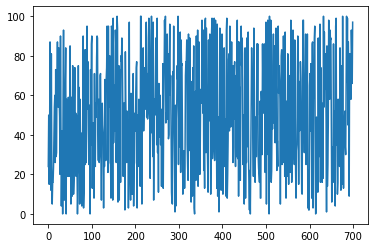

In [31]:
plt.plot(df_train['x'])

C:\Python3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

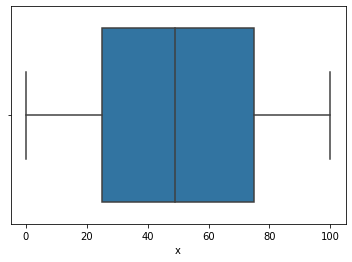

In [32]:
sns.boxplot(df_train['x'])

In [34]:
df_train['x'] = df_train['x'].clip(upper=df_train['x'].quantile(0.99))
df_train['x'] = df_train['x'].clip(lower=df_train['x'].quantile(0.01))
df_train['y'] = df_train['x'].clip(upper=df_train['y'].quantile(0.99))
df_train['y'] = df_train['x'].clip(lower=df_train['y'].quantile(0.01))

In [35]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_test,y_test)

LinearRegression()

In [38]:
model.score(X_test,y_test)

0.9891203611402716

In [42]:
model.predict(X_test)

array([ 77.64201157,  20.83923168,  21.85356704,  19.82489633,
        36.05426201,  14.75321955,  62.42698124,  95.90004796,
        19.82489633,   4.609866  ,   3.59553065,  18.81056097,
        96.91438332,  62.42698124,  36.05426201,  14.75321955,
        65.46998731,  13.7388842 ,  87.78536512,  69.52732873,
        89.81403583,  51.26929234,  89.81403583,  26.92524381,
        97.92871867,  58.36963982,  79.67068228,  20.83923168,
        93.87137725,  26.92524381,  99.95738938,  30.98258524,
        33.01125595,  80.68501764,  27.93957917,  47.21195092,
        53.29796305,  69.52732873,  27.93957917,  33.01125595,
        91.84270654,  71.55599944,  50.25495698,  76.62767622,
         3.59553065,  37.06859737,  70.54166408,  68.51299337,
        40.11160343,  35.03992666,  94.88571261,  88.79970048,
        52.28362769,  30.98258524,  59.38397518,  -0.46181077,
        39.09726808,  64.45565195,  69.52732873,  57.35530447,
        12.72454884,  72.57033479,  76.62767622,  61.41